1.Consumo di alcol per paese
Esegui un’analisi esplorativa focalizzata sul consumo di alcol.
Analizza i seguenti aspetti:

Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

Calcola la media del consumo di birra, vino, e distillati

Crea una nuova colonna alcohol_index che sia: (beer_servings + wine_servings + spirit_servings) / 3

Trova il paese con il valore massimo di alcohol_index

Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

15                Belarus
98              Lithuania
3                 Andorra
68                Grenada
61                 France
45         Czech Republic
141    Russian Federation
99             Luxembourg
155              Slovakia
81                Ireland
Name: country, dtype: object
106.16062176165804
49.45077720207254
80.99481865284974
0        0
1       91
2       13
3      231
4      106
      ... 
188    145
189     38
190      2
191     18
192     28
Name: alcohol_index, Length: 193, dtype: int64
3    Andorra
Name: country, dtype: object
3                Andorra
4                 Angola
5      Antigua & Barbuda
6              Argentina
8              Australia
             ...        
182       United Kingdom
184                  USA
185              Uruguay
188            Venezuela
189              Vietnam
Name: country, Length: 79, dtype: object


Text(0, 0.5, 'Servizi di vino')

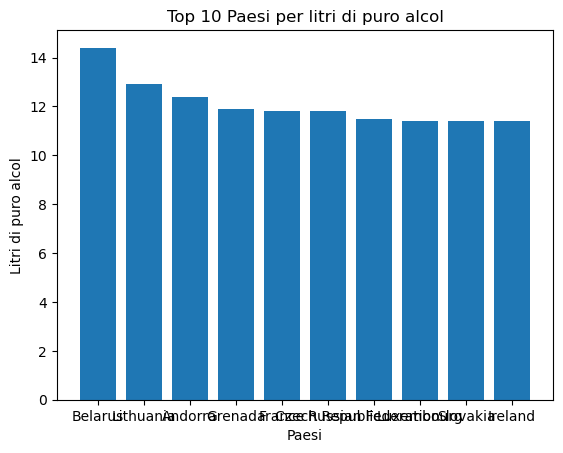

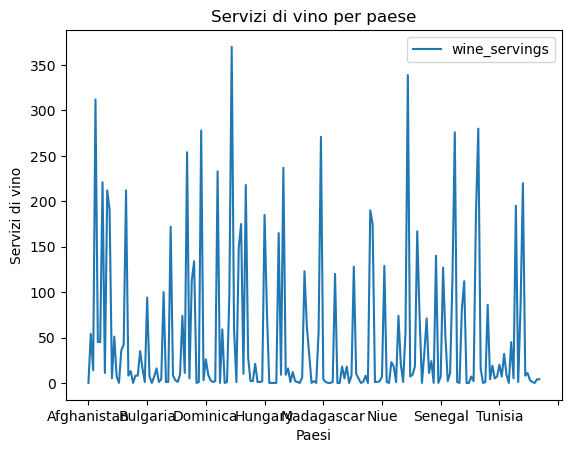

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

#1
TotLit =df.sort_values(by="total_litres_of_pure_alcohol", ascending=False)
highest=TotLit.head(10)
highest=highest.loc[:,"country"]
print(highest)

#2
two_1 = df.beer_servings
two_1 = pd.Series(two_1).mean() # == df.beer_servings.mean()
print(two_1)
two_2 = df.wine_servings
two_2 = pd.Series(two_2).mean()
print(two_2)
two_3 = df.spirit_servings
two_3 = pd.Series(two_3).mean()
print(two_3)

#3
df["alcohol_index"] = ((df.beer_servings + df.wine_servings + df.spirit_servings)/3).astype(int)
print(df.alcohol_index)

#4
Max_ali=df.sort_values(by="alcohol_index", ascending=False)
Max_ali = Max_ali.head(1)
Max_ali=Max_ali.loc[:,"country"]
print(Max_ali)

#5
more_beers = df[df["beer_servings"] > 100].loc[:,"country"]
print(more_beers)

#6
#TotLit =df.sort_values(by="total_litres_of_pure_alcohol", ascending=False)
highest = TotLit.head(10)
countries = highest["country"]
alcohol = highest["total_litres_of_pure_alcohol"]
highest_bar = plt.bar(countries, alcohol)
plt.title('Top 10 Paesi per litri di puro alcol')
plt.xlabel('Paesi')
plt.ylabel('Litri di puro alcol')

#6

df.plot(kind="line", y="wine_servings", x="country")
plt.title('Servizi di vino per paese')
plt.xlabel('Paesi')
plt.ylabel('Servizi di vino')


2.Analisi offerte di lavoro
Esegui un’analisi esplorativa focalizzata sui lavori nel campo dei dati in ciascun paese.
Analizza i seguenti aspetti per ogni paese:

Lo stipendio medio annuale (salary_year_avg)
Il numero totale di offerte di lavoro (job count)
L’intervallo degli stipendi: valore minimo e massimo (min / max)
Rappresenta graficamente lo stipendio medio (salary_year_avg) per job_title_short usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#1
avg=df[["job_country","salary_year_avg"]]
avg=avg.dropna()
print(avg)

#2
job_counts = df.groupby('job_country')['job_title_short'].value_counts()
print(job_counts)

#3
interval = df.groupby("job_country")["salary_hour_avg"].agg(["min","max"])
print(interval)

#4
paesi = df['job_country'].unique()
for paese in paesi:
    dati_paese = df[df['job_country'] == paese]
    dati_lavoro= dati_paese.groupby("job_title_short")["salary_year_avg"].mean()
    dati_lavoro.plot(kind="barh")
    plt.title('Salario medio per lavoro in {}'.format(paese))
    plt.xlabel('Titolo di lavoro')
    plt.ylabel('Stipendio medio')
    plt.show()





c:\Users\hp\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\hp\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this artic

KeyboardInterrupt: 